In [1]:
from utils import *
from jupyter_utils import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import find_peaks
import matplotlib
from ising_builds.cy_ising_cluster import simulate
from tqdm import tqdm
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
U_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
lengths = [250, 500, 1000, 2000]

In [4]:
def read_dir(dir_name: str, lengths: list, load_number=None):
    if dir_name[-1] != '/':
        dir_name += '/'
    dirs = os.listdir(dir_name)

    res = {}
    for d in dirs:
        for L in lengths:
            if d.find(f'L{L}') != -1 or d.find(f'L={L}') != -1:
                print(L, d)
                res[L] = load_Conformations_lite_from_dir(dir_name+d, load_count=load_number)

    return res


In [5]:
def mean_mag_from_list(confs):
    mag = np.zeros_like(confs[0].mag2)
    for c in confs:
        mag += c.mag2
    
    mag /= len(confs)
    err = np.zeros_like(mag)
    for c in confs:
        err += (c.mag2 - mag) ** 2
    
    err /= len(confs)
    err = np.sqrt(err)
    return mag, err

In [6]:
confs = {}

for u in U_values:
    confs[u] = read_dir(f"Conformations/U={u}/", lengths, load_number=1000)


1000 L1000_beta_0.1_1_10(1000)
2000 L2000_beta_0.1_1_10(1000)
500 L500_beta_0.1_1_10(1000)
250 L250_beta_0.1_1_10(1000)
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L500_beta0.1_1_10(10000)
250 L250_beta0.1_1_10(10000)
2000 L2000_beta0.1_1_10(10000)
1000 L1000_beta0.1_1_10(10000)


In [7]:
confs[0.1].keys()

dict_keys([1000, 2000, 500, 250])

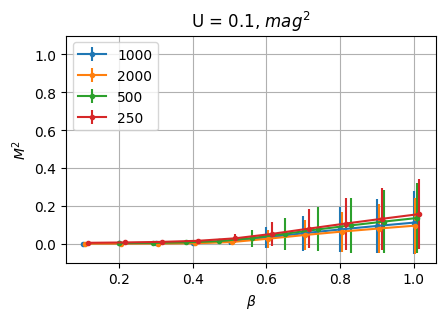

<Figure size 477.377x295.035 with 0 Axes>

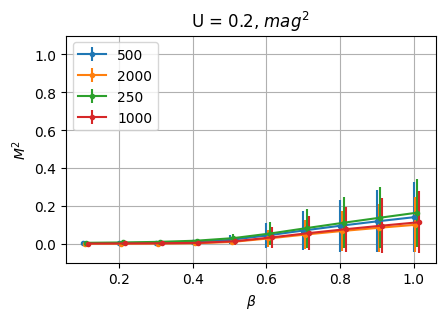

<Figure size 477.377x295.035 with 0 Axes>

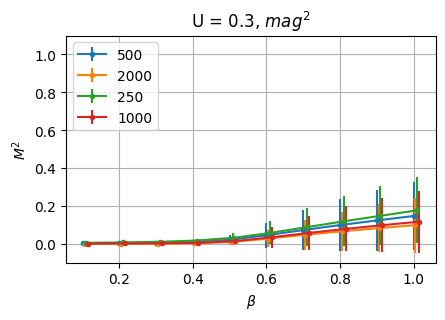

<Figure size 477.377x295.035 with 0 Axes>

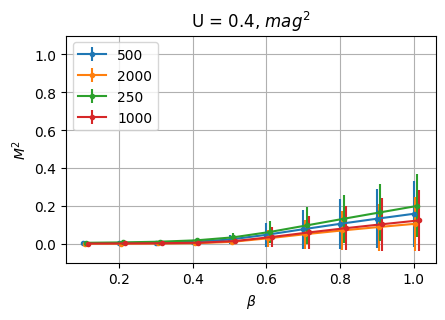

<Figure size 477.377x295.035 with 0 Axes>

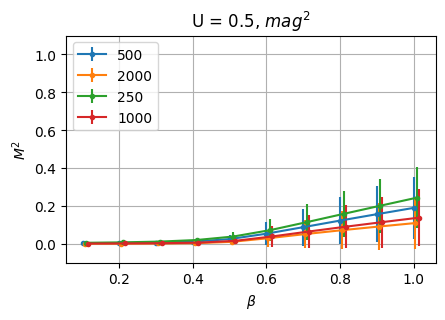

<Figure size 477.377x295.035 with 0 Axes>

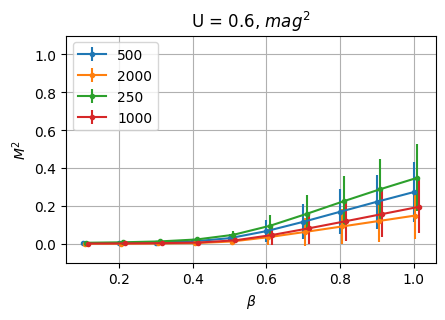

<Figure size 477.377x295.035 with 0 Axes>

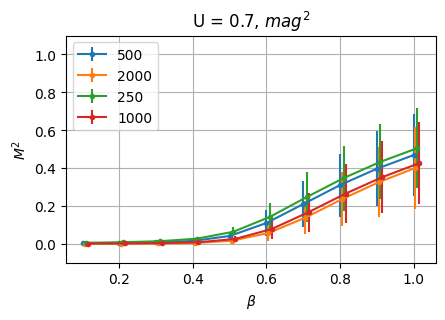

<Figure size 477.377x295.035 with 0 Axes>

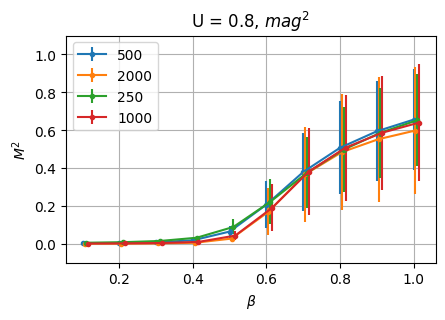

<Figure size 477.377x295.035 with 0 Axes>

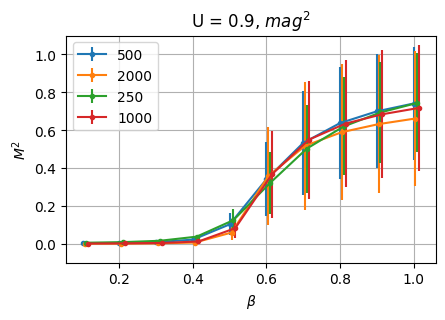

<Figure size 477.377x295.035 with 0 Axes>

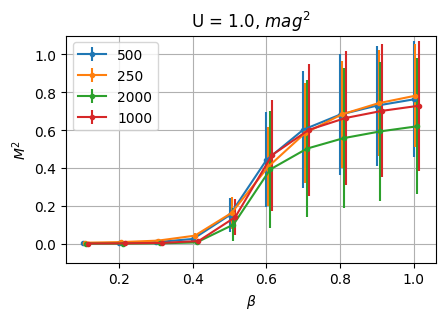

<Figure size 477.377x295.035 with 0 Axes>

In [8]:
for u, conf in confs.items():
    plt.figure(figsize=set_size())
    plt.title(f"U = {u}, $mag^2$")
    plt.xlabel(BETA)
    plt.ylabel("$M^2$")
    plt.ylim((-0.1, 1.1))
    k = 0
    for L, c in conf.items():
        mag, err = mean_mag_from_list(c)
        plt.errorbar(x=c[0].betas + 0.005*k, y=mag, fmt='.-', yerr=err, label=f"{L}")
        k += 1

    plt.legend(loc="upper left")
    plt.grid(True)
    save_fig(plt.gcf(), f"reports/images/temp_scaling/temp_mag2_U{u}")
    plt.show()


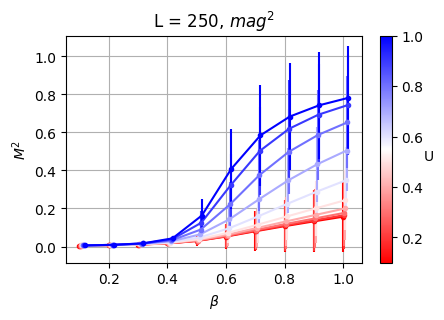

<Figure size 477.377x295.035 with 0 Axes>

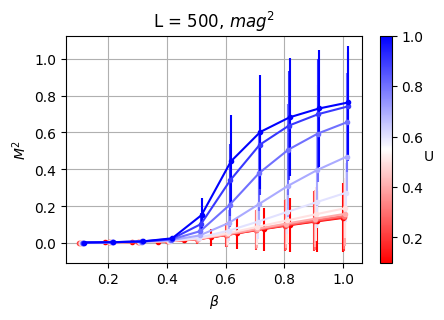

<Figure size 477.377x295.035 with 0 Axes>

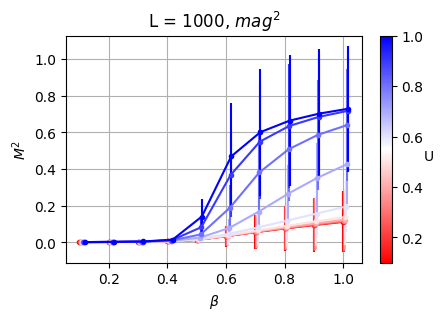

<Figure size 477.377x295.035 with 0 Axes>

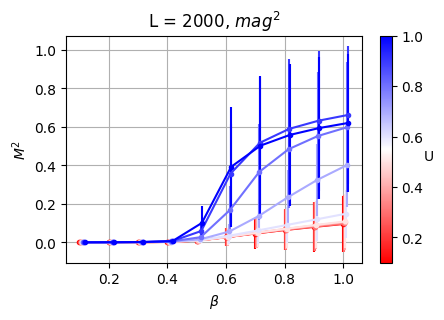

<Figure size 477.377x295.035 with 0 Axes>

In [18]:
for L in lengths:
    plt.figure(figsize=set_size())
    plt.title(f"L = {L}, $mag^2$")
    plt.xlabel(BETA)
    plt.ylabel("$M^2$")
    cmap='bwr_r'
    cmap = mpl.cm.get_cmap(cmap)
    norm=plt.Normalize(vmin=min(U_values), vmax=max(U_values))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    k = 0
    for u in U_values:
        c = confs[u][L]
        mag, err = mean_mag_from_list(c)
        plt.errorbar(x=c[0].betas + 0.002*k, y=mag, fmt='.-', color=cmap(norm(u)),  yerr=err, label=f"{u}")
        k += 1
    clb = plt.colorbar(sm, ax=plt.gcf().axes[0], cmap=cmap)
    clb.set_label(label="U", rotation=0., loc='center')
    # plt.legend(loc="upper left")
    plt.grid(True)
    save_fig(plt.gcf(), f"./reports/images/temp_scaling/temp_mag2_L{L}")
    plt.show()


In [16]:
MC_all = {}
for u, conf in confs.items():
    mc = {}
    for L, con in conf.items():
        mc[L] = []
        for c in con:
            mc[L].append(magnetic_susceptibility(c))
    MC_all[u] = mc

In [17]:
def find_ms_peaks(confs):
    p = []
    for c in confs:
        ms = magnetic_susceptibility(c)
        p.append(np.argmax(ms))
        
    return p

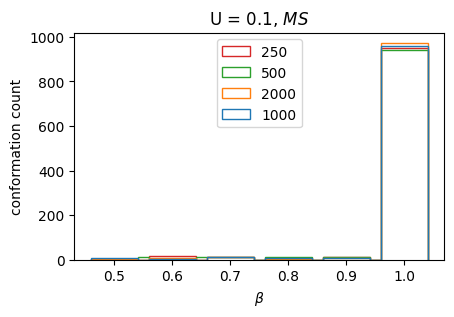

<Figure size 477.377x295.035 with 0 Axes>

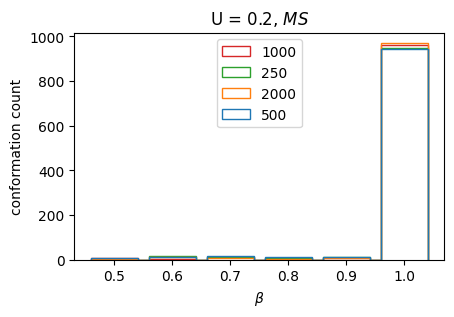

<Figure size 477.377x295.035 with 0 Axes>

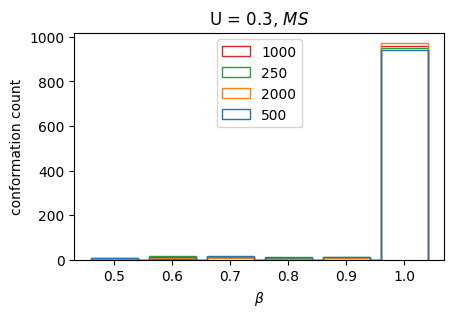

<Figure size 477.377x295.035 with 0 Axes>

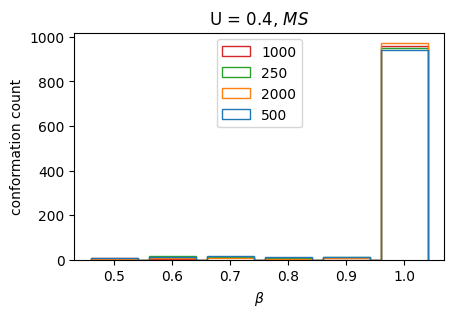

<Figure size 477.377x295.035 with 0 Axes>

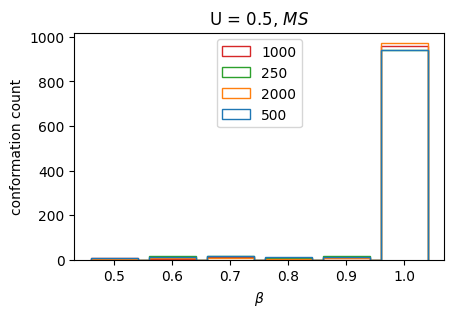

<Figure size 477.377x295.035 with 0 Axes>

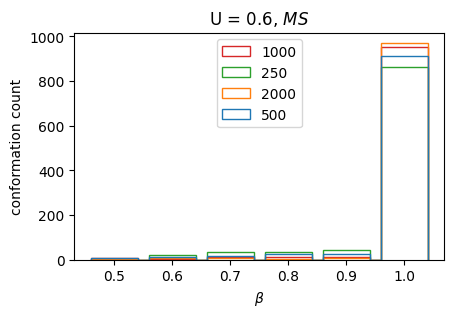

<Figure size 477.377x295.035 with 0 Axes>

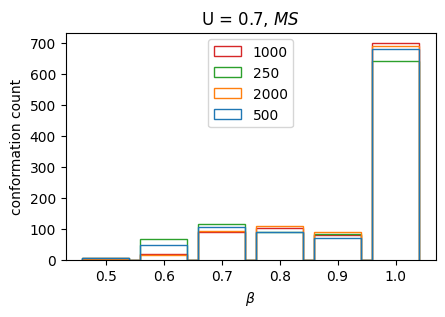

<Figure size 477.377x295.035 with 0 Axes>

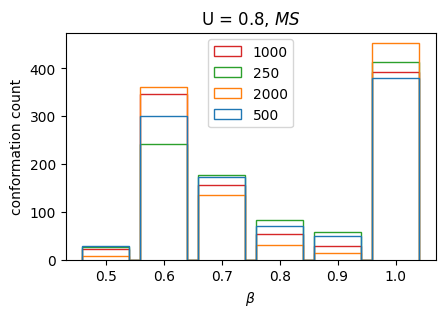

<Figure size 477.377x295.035 with 0 Axes>

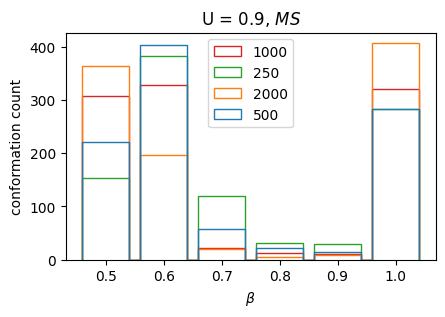

<Figure size 477.377x295.035 with 0 Axes>

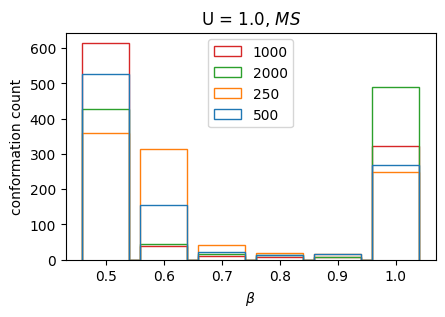

<Figure size 477.377x295.035 with 0 Axes>

In [14]:
bins = []
for b in np.linspace(0.5, 1, 6):
    bins.append(b - 0.04)
    bins.append(b + 0.04)
for u, MC in MC_all.items():
    plt.figure(figsize=set_size())
    plt.title(f"U = {u}, $MS$")
    plt.xlabel(BETA)
    plt.ylabel("conformation count")
    hists = []
    labels = []
    for L, mc in MC.items():
        peaks = []
        for m in mc:
            peaks.append(np.argmax(m))
        peaks_beta = confs[u][L][0].betas[peaks]
        hists.append(peaks_beta)
        labels.append(str(L))
    plt.hist(hists, bins=bins, histtype="step", label=labels)
    plt.legend(loc="upper center")
    save_fig(plt.gcf(), f"reports/images/temp_scaling/temp_ms_U{u}")
    plt.show()
    

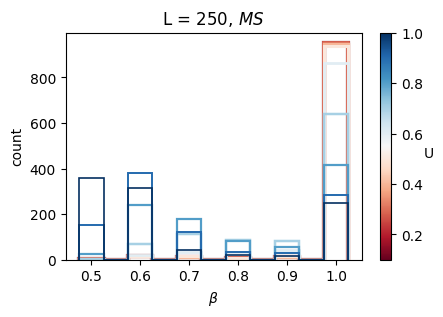

<Figure size 477.377x295.035 with 0 Axes>

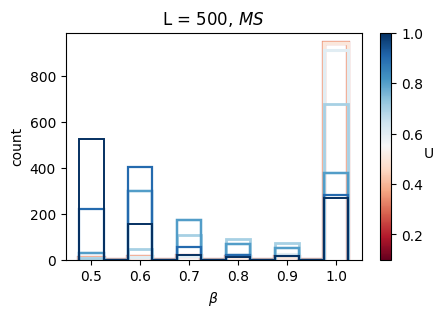

<Figure size 477.377x295.035 with 0 Axes>

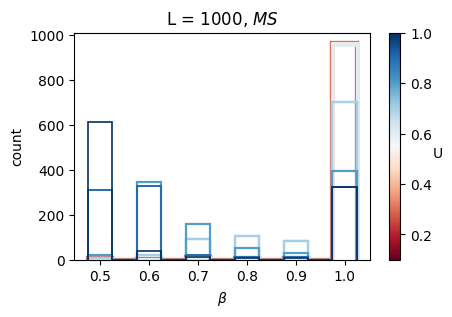

<Figure size 477.377x295.035 with 0 Axes>

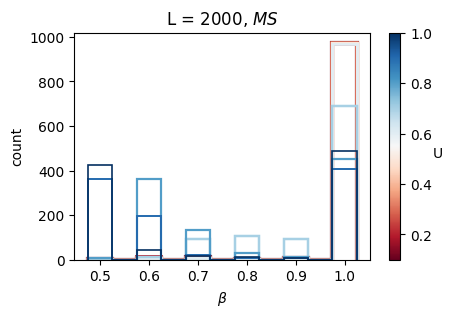

<Figure size 477.377x295.035 with 0 Axes>

In [20]:

for L in lengths:
    plt.figure(figsize=set_size())
    plt.title(f"L = {L}, $MS$")
    plt.xlabel(BETA)
    plt.ylabel("count")
    hists = []
    labels = []
    colors = []
    bins_arr = []
    cmap='RdBu'
    cmap = mpl.cm.get_cmap(cmap)
    norm=plt.Normalize(vmin=min(U_values), vmax=max(U_values))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    k = 0
    for u in U_values:
        if L == 500 and u == 0.1:
            continue
        mc = MC_all[u][L]
        peaks = []
        for m in mc:
            peaks.append(np.argmax(m))
        peaks_beta = confs[u][L][0].betas[peaks]
        hists.append(peaks_beta)
        labels.append(str(L))
        colors.append(cmap(norm(u)))
        bins = []
        for x in np.linspace(0.5, 1.0, 6):
            add = 0.025 
            bins.append(x-add)
            bins.append(x+add)
        bins_arr.append(bins)
        plt.hist(peaks_beta, bins=bins, histtype="step", label=str(L), color=cmap(norm(u)), linewidth=3-0.2*k)
        k += 1
    # plt.hist(hists, bins=bins_arr, histtype="step", label=labels, color=colors)
    clb = plt.colorbar(sm, ax=plt.gcf().axes[0], cmap=cmap)
    clb.set_label(label="U", rotation=0., loc='center')
    # plt.legend(loc="upper center")
    # plt.grid(True)
    save_fig(plt.gcf(), f"./reports/images/temp_scaling/temp_ms_L{L}")
    plt.show()
    

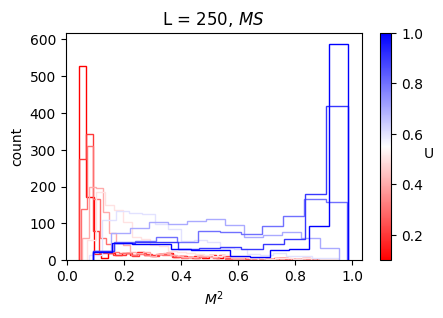

<Figure size 477.377x295.035 with 0 Axes>

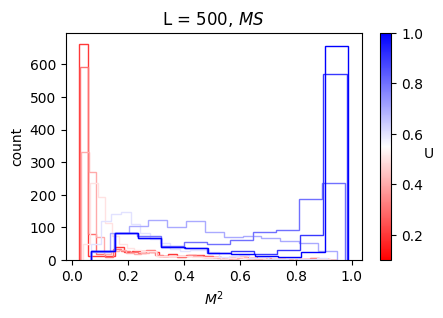

<Figure size 477.377x295.035 with 0 Axes>

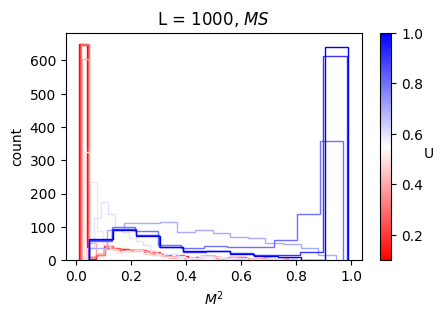

<Figure size 477.377x295.035 with 0 Axes>

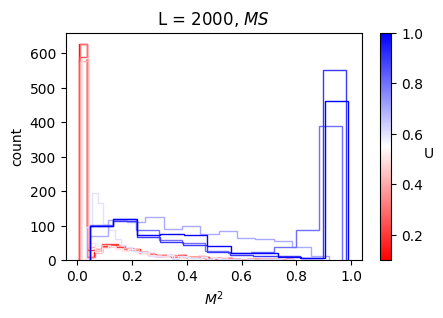

<Figure size 477.377x295.035 with 0 Axes>

In [19]:

for L in lengths:
    plt.figure(figsize=set_size())
    plt.title(f"L = {L}, $MS$")
    plt.xlabel("$M^2$")
    plt.ylabel("count")
    hists = []
    labels = []
    colors = []
    bins_arr = []
    cmap='bwr_r'
    cmap = mpl.cm.get_cmap(cmap)
    norm=plt.Normalize(vmin=min(U_values), vmax=max(U_values))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    k = 0
    for u in U_values:
        if L == 500 and u == 0.1:
            continue
        
        peaks = []
        for c in confs[u][L]:
            peaks.append(c.mag2[-1])
        hists.append(peaks)
        labels.append(str(L))
        colors.append(cmap(norm(u)))
        bins = []
        for x in np.linspace(0., 1.0, 10):
            add = 0.025 
            bins.append(x-add)
            bins.append(x+add)
        bins_arr.append(bins)
        plt.hist(peaks, bins="auto", histtype="step", label=str(L), color=cmap(norm(u)), linewidth=1)
        k += 1
    # plt.hist(hists, bins=bins_arr, histtype="step", label=labels, color=colors)
    clb = plt.colorbar(sm, ax=plt.gcf().axes[0], cmap=cmap)
    clb.set_label(label="U", rotation=0., loc='center')
    # plt.legend(loc="upper center")
    # plt.grid(True)
    save_fig(plt.gcf(), f"./reports/images/temp_scaling/temp_mag2_last_L{L}")
    plt.show()
    

In [13]:
U_values_close = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
confs_close = {}

for u in U_values_close:
    confs_close[u] = read_dir(f"Conformations/close_to_transitoin/U={u}/", lengths, load_number=1000)


500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000
500 L=500
2000 L=2000
250 L=250
1000 L=1000


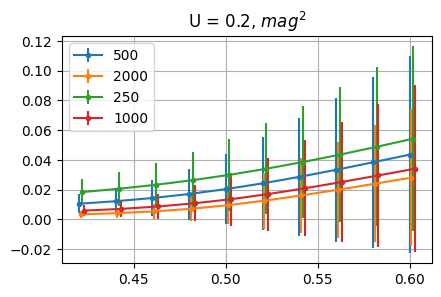

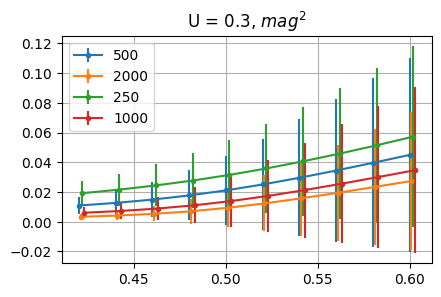

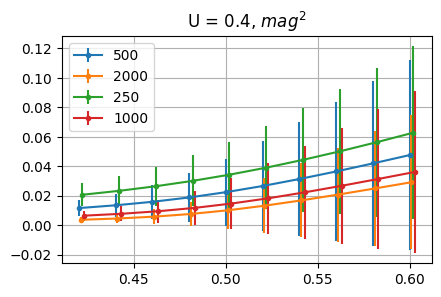

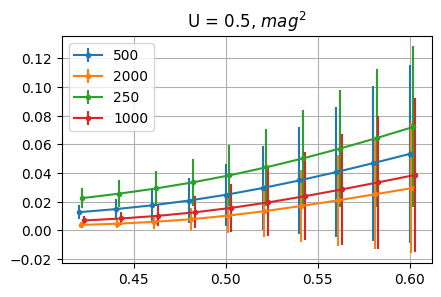

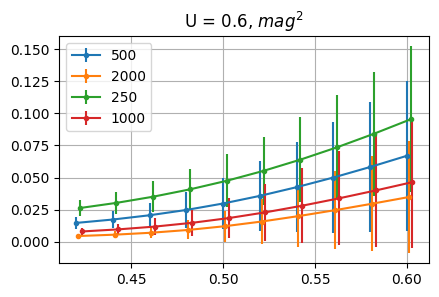

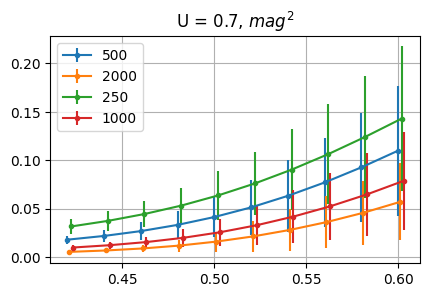

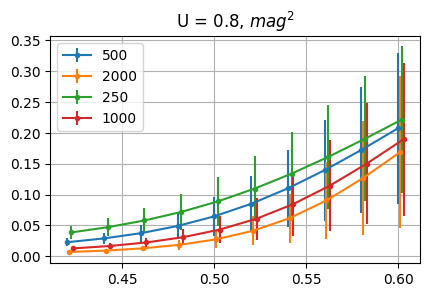

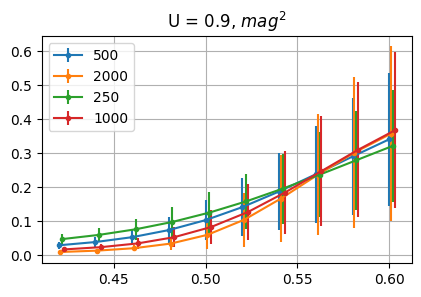

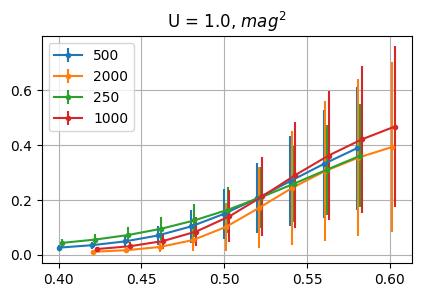

In [15]:
for u, conf in confs_close.items():
    plt.figure(figsize=set_size())
    plt.title(f"U = {u}, $mag^2$")
    k = 0
    for L, c in conf.items():
        mag, err = mean_mag_from_list(c)
        plt.errorbar(x=c[0].betas + 0.001*k, y=mag, fmt='.-', yerr=err, label=f"{L}")
        k += 1

    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()


1000
1000
1000
1000


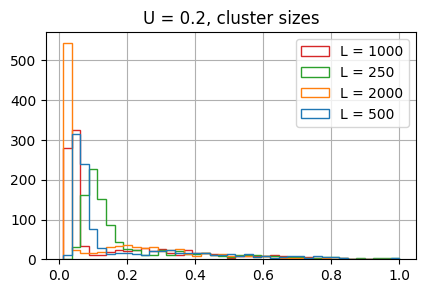

1000
1000
1000
1000


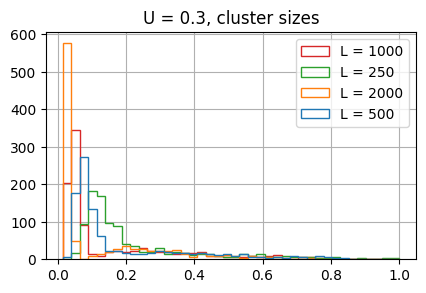

1000
1000
1000
1000


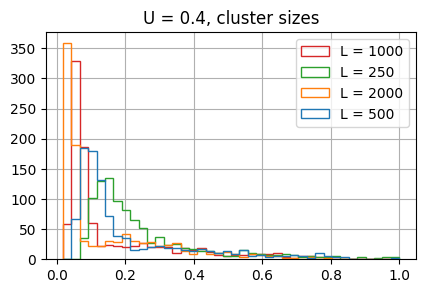

1000
1000
1000
1000


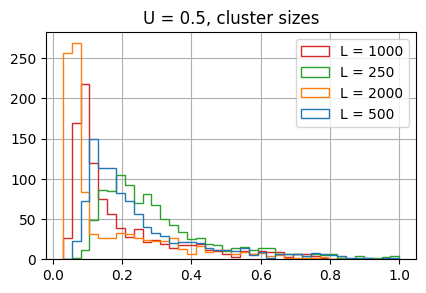

1000
1000
1000
1000


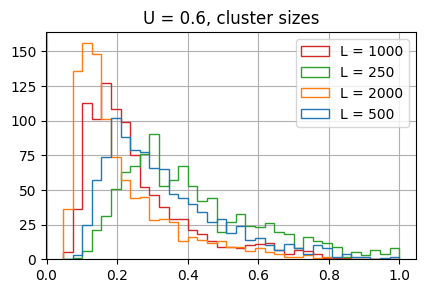

1000
1000
1000
1000


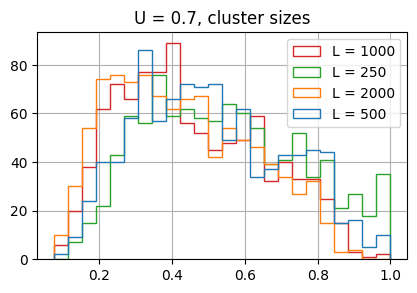

1000
1000
1000
1000


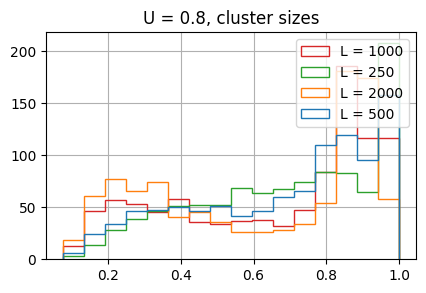

1000
1000
1000
1000


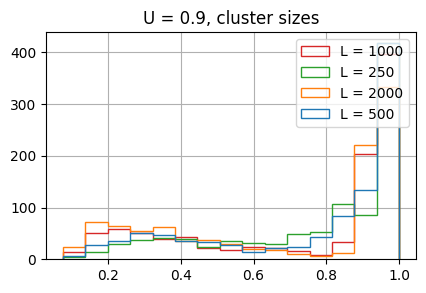

1000
1000
1000
1000


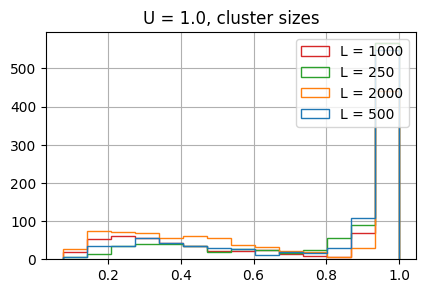

In [23]:
for u, conf in confs_close.items():
    plt.figure(figsize=set_size())
    plt.title(f"U = {u}, cluster sizes")
    k = 0
    hists = []
    legend = []
    for L, c in conf.items():
        cl, br = clusters_and_bridges_from_list(c)
        hists.append([max(clasters) / (L+1) for clasters in cl])
        legend.append(f"L = {L}")
        
    plt.hist(hists, bins="auto", histtype="step", label=legend)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
